# __<center>Coursera - IBM Data Science Professional Certification Program__
# <center>    Applied Data Science Capstone Course - Week 2
# <center> Project: Battle of Neighborhoods – New Restaurant in Central Ohio, US

#### by __Venkat Punugu__

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### __Table of Contents__ <a name="TOC"></a>

I. [Introduction](#Intro)

>A. [Business Problem](#BusProb)
    
>B. [Target Audience](#Target)
    
II. [Data](#Dat)

III. [Setup of Environment](#Setup)

IV. [Download and Explore Data](#Explore)

V. [Methodology](#Methods)

VI. [Results and Discussion](#Results)

VII. [Conclusion](#Conclusion)

VIII. [Appendix](#Appendix)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### __I. Introduction__ <a name="Intro"></a>                                                                                                                   
[_Back to Table of Contents_](#TOC)

#### A. Business Problem <a name="BusProb"></a>
>Ohio is a state in the East North Central Region of the Midwestern United States – its 17th and incorporated into union in 1803. Ohio has given 8 Presidents (__Presidents - WH Harrison, Grant, Hayes, Garfield, B Harrison, McKinley, Taft, Harding__), Notable Astronauts like __John Glenn__ (First American in Space), __Neil Armstrong__ (First Man to walk on Moon – Apollo 11), __John Lovell__ (Famous for bringing back live – Apollo 13), __Judith Resnick__ (Part of Space Shuttle Challenger Crew exploded shortly after takeoff). Franklin County (Names after __Benjamin Franklin__, Statesman, Scientist, and Inventor) is in central Ohio and is the jurisdiction which houses Capitol __City of Columbus__ which is the seat of power for the State of Ohio. Columbus is also the largest City in Ohio.

>With its business-friendly atmosphere, large vibrant population, growing diverse demography, Columbus and its immediate neighborhood cities in __Franklin County__ offer many business opportunities for new businesses. Franklin County also houses many of the Top 20 cities in terms of Median Family Income, one of the important indicators of disposable income which will influence the spend on the consumption especially on food and restaurants. It is also observed that Asian descent and especially Indian descent population is one of the top earning demography and therefore an opportunity for the success of the business with a focus on their culture and tastes. 

>The present exercise is to study Columbus and its neighborhood of Franklin County with a view to recommend three cities for establishing an Indian Restaurant in one of them. 

#### B. Target Audience: <a name="Target"></a>
>a. ***Entrepreneurs*** targeting to open Indian Restaurant in the state.

>b. ***Any other interested party or established entities*** in restaurant business in opening a restaurant in Central Ohio.

>c. ***Data Science Students*** to carry forward the analysis and bring out new insights with the help of additional data/analysis/research.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### __II. Data__ <a name='Dat'></a>
[_Back to Table of Contents_](#TOC)

>a. __City Data:__ City of Columbus lies within the Franklin County and is surrounded by several cities in suburbs. These cities also fall within the jurisdiction of Franklin County. Some of these cities are also target for the location of the restaurant. Therefore, the list of cities in the Franklin County is used for the analysis. [1]

>b. __Location:__ ARCGIS is used to retrieve the latitude and longitude data and we will be using the geocode function for the purpose.

>c. __Venues in the cities:__ FOURSQUARE API is used to retrieve all the venues within the cities in the analysis

>d. A radius of 500 meters were used to retrieve the venues in each of the cities – these however were giving a very short list and at the same time, based on the latitude and longitude of the center of the target city, resulted in not picking up the venues and city. Some important cities like Dublin were totally missing. Therefore, __the radius was increased to 2000 meters.__ This provided a good selection of the venues across all the cities in the county. 

>e. __Income Data:__ We will be using a commercial data that is derived from the US Census to retrieve the median income of the cities. [8]

>f. __SKLEARN__ – Scikit Learn package is used for arriving at the KMean for the venues.  

>g. __Visualization:__ 

>>1. __Folium__ package is used for the geographical mapping and cluster visualization.    
>>2. __Yellowbrick__ is used for the visualization using the KElbowVisualizer for displaying the optimum number of K-Mean clusters to be used for grouping the venues.
>>3. __Matplotlib.pyplot__ is used for the visualization of the venues across the cities

>h. __Data Usage:__ The above data will be used to arrive at top 3 cities for the recommendation.


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## III. Setup of Environment <a name="Setup"></a>
[_Back to Table of Contents_](#TOC)

>We will be using the following Python Libraries:
NUMPY, PANDAS, JSON, GEOPY, REQUESTS, MATPLOTLIB, SKLEARN, FOLIUM

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
pip install arcgis

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## IV. Download and Explore the data <a name="Explore"></a>
[_Back to Table of Contents_](#TOC)

In this initial steps, the following tasks are completed:

>__Step 1:__ The list of cities in the Franklin County is retrieved. The wikipedia site https://en.wikipedia.org/wiki/List_of_cities_in_Ohio contains all cities in Ohio - 276 in total

>__Step 2:__ Narrow down the cities in Franklin County - Franklin County has 16 cities.

>__Step 3:__ _franklin_cities_ is the data frame which will contain the city name, its latitude and Longitude

>__Step 4:__ ARCGIS API _geocode_ is used to get the latitude and longitude of each of the cities. 

>__Step 5:__ FOURSQUARE API is used in this analysis to get the details of the venues in each of the Cities in Franklin County, OH. The Radius is kept at 2000 meters

>__Step 6:__ Get the list of venues in all 16 cities identified on the map

>__Step 7:__ Group by and Get the total number of venues each of the 16 cities

>__Step 8:__ Get the number of Indian Restaurants in the Dataset

>__Step 9:__ Visualization of the total number of venues each of the 16 cities

>__Step 10:__ Get Income Data of the cities in Franklin County and their relative Ranking

>__Step 11:__ Get Demographic and Population Data

### __Step 1:__ The list of cities in the Franklin County is retrieved. 

In [3]:
url_franklin ="https://en.wikipedia.org/wiki/List_of_cities_in_Ohio"
wiki_franklin_url = requests.get(url_franklin)
wiki_ohio_cities_raw = pd.read_html(wiki_franklin_url.text)
wiki_ohio_cities_raw[0].shape

(276, 3)

### __Step 2:__ Narrow down the cities in Franklin County - Franklin County has 16 cities.

In [4]:
wiki_ohio_cities=wiki_ohio_cities_raw[0]
wiki_franklin_cities = wiki_ohio_cities[wiki_ohio_cities['County']=='Franklin']
wiki_franklin_cities.shape

(16, 3)

### __Step 3:__ _franklin_cities_ is the data frame which will contain the city name, its latitude and Longitude

In [5]:
# define the dataframe columns
column_names = ['City', 'Latitude', 'Longitude'] 

# instantiate the dataframe
franklin_cities = pd.DataFrame(columns=column_names)
franklin_cities

,City,Latitude,Longitude


In [6]:
franklin_cities['City']=wiki_franklin_cities['City']

In [7]:
from arcgis.geocoding import geocode

### __Step 4:__ ARCGIS API _geocode_ is used to get the latitude and longitude of each of the cities.

In [17]:
# Need to concatenate the city name with State as '<city>, OH' when getting the lat and long data since 
# there are 4 cities of the 16 which are common with 4 other cities in the world - ex: Dublin query gives the lat and long of 
# Dubin in Ireland

for i, row in franklin_cities.iterrows():
    geolocator = Nominatim(user_agent="ny_explorer")
    addr = franklin_cities['City'][i]+', OH'
    location = geolocator.geocode(addr)
    franklin_cities['Latitude'][i] = location.latitude
    franklin_cities['Longitude'][i] = location.longitude
    print(franklin_cities['City'][i], ': ',
          franklin_cities['Latitude'][i], ',',
          franklin_cities['Longitude'][i] )

Bexley :  39.9692378 , -82.936864
Canal Winchester :  39.842920500000005 , -82.81594617222837
Columbus :  39.9622601 , -83.0007065
Dublin :  40.0992294 , -83.1140771
Gahanna :  40.0195625 , -82.8791363
Grandview Heights :  39.9797863 , -83.0407403
Grove City :  39.8814519 , -83.0929645
Groveport :  39.8522449 , -82.8868636
Hilliard :  40.033814 , -83.1596108
New Albany :  40.0811745 , -82.8087864
Pickerington :  39.896277299999994 , -82.77319049748806
Reynoldsburg :  39.9547861 , -82.8121191
Upper Arlington :  39.9945084 , -83.0624078
Westerville :  40.126139 , -82.9295287
Whitehall :  39.9667308 , -82.8854559
Worthington :  40.0930945 , -83.0179593


In [18]:
franklin_cities

,City,Latitude,Longitude
23,Bexley,39.9692,-82.9369
38,Canal Winchester,39.8429,-82.8159
58,Columbus,39.9623,-83.0007
71,Dublin,40.0992,-83.1141
91,Gahanna,40.0196,-82.8791
97,Grandview Heights,39.9798,-83.0407
100,Grove City,39.8815,-83.093
101,Groveport,39.8522,-82.8869
106,Hilliard,40.0338,-83.1596
161,New Albany,40.0812,-82.8088


### __Step 5:__ Let us see how the Franklin County looks with all 16 cities identified on the map

In [20]:
address = 'Columbus, OH'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Columbus, OH are {}, {}.'.format(latitude, longitude))
    
# create map of toronto using latitude and longitude values
columbus_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(franklin_cities['Latitude'], franklin_cities['Longitude'], 
                           franklin_cities['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(columbus_map) 

columbus_map

The geograpical coordinate of Columbus, OH are 39.9622601, -83.0007065.


In [21]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

### __Step 6:__ Get the list of venues in all 16 cities identified on the map

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
# type your answer here
franklin_cities_venues = getNearbyVenues(names=franklin_cities['City'],
                                   latitudes=franklin_cities['Latitude'],
                                   longitudes=franklin_cities['Longitude']
                                  )

Bexley
Canal Winchester
Columbus
Dublin
Gahanna
Grandview Heights
Grove City
Groveport
Hilliard
New Albany
Pickerington
Reynoldsburg
Upper Arlington
Westerville
Whitehall
Worthington


In [24]:
print(franklin_cities_venues.shape)
franklin_cities_venues.head()

(1179, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bexley,39.969238,-82.936864,Jeffrey Park,39.972572,-82.943011,Park
1,Bexley,39.969238,-82.936864,Franklin Park Conservatory and Botanical Gardens,39.965933,-82.952814,Garden
2,Bexley,39.969238,-82.936864,Giant Eagle Market District Express,39.957479,-82.939145,Supermarket
3,Bexley,39.969238,-82.936864,Franklin Park Community Garden Campus,39.967486,-82.951224,Garden
4,Bexley,39.969238,-82.936864,Giuseppe's Ritrovo,39.957316,-82.938282,Italian Restaurant


### __Step 7:__ Group by and Get the total number of venues each of the 16 cities

In [25]:
franklin_cities_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Bexley,81,81,81,81,81,81
Canal Winchester,56,56,56,56,56,56
Columbus,100,100,100,100,100,100
Dublin,100,100,100,100,100,100
Gahanna,67,67,67,67,67,67
Grandview Heights,100,100,100,100,100,100
Grove City,49,49,49,49,49,49
Groveport,22,22,22,22,22,22
Hilliard,77,77,77,77,77,77


In [26]:
print('There are {} uniques categories.'.format(len(franklin_cities_venues['Venue Category'].unique())))

There are 205 uniques categories.


In [27]:
df_restaurants = franklin_cities_venues[franklin_cities_venues['Venue Category'].str.contains('Restaurant')]
df_restaurants.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
4,Bexley,39.969238,-82.936864,Giuseppe's Ritrovo,39.957316,-82.938282,Italian Restaurant
7,Bexley,39.969238,-82.936864,Brassica,39.957333,-82.940051,Mediterranean Restaurant
9,Bexley,39.969238,-82.936864,Cafe Istanbul,39.956912,-82.933237,Turkish Restaurant
16,Bexley,39.969238,-82.936864,Moshi Sushi Bar,39.957418,-82.942211,Sushi Restaurant
20,Bexley,39.969238,-82.936864,Pita House,39.971507,-82.921137,Middle Eastern Restaurant


### Step 8: Get the number of Indian Restaurants in the Dataset

In [87]:
df_restaurants[df_restaurants['Venue Category'].str.contains('Indian')]

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
57,Bexley,39.969238,-82.936864,Aab India Restaurant,39.957236,-82.934840,Indian Restaurant
228,Columbus,39.962260,-83.000707,Indian Oven,39.957369,-82.987884,Indian Restaurant
422,Grandview Heights,39.979786,-83.040740,Aab India Restaurant,39.987737,-83.044456,Indian Restaurant
839,Upper Arlington,39.994508,-83.062408,Aab India Restaurant,39.987737,-83.044456,Indian Restaurant


In [28]:
franklin_cities_venues.groupby('City').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City,,,,,,
Bexley,81,81,81,81,81,81
Canal Winchester,56,56,56,56,56,56
Columbus,100,100,100,100,100,100
Dublin,100,100,100,100,100,100
Gahanna,67,67,67,67,67,67
Grandview Heights,100,100,100,100,100,100
Grove City,49,49,49,49,49,49
Groveport,22,22,22,22,22,22
Hilliard,77,77,77,77,77,77


### __Step 9:__ Visualization of the total number of venues each of the 16 cities

In [29]:
df_rest = franklin_cities_venues[['City']].groupby(['City'])
cts = df_rest.size().to_frame(name='counts')

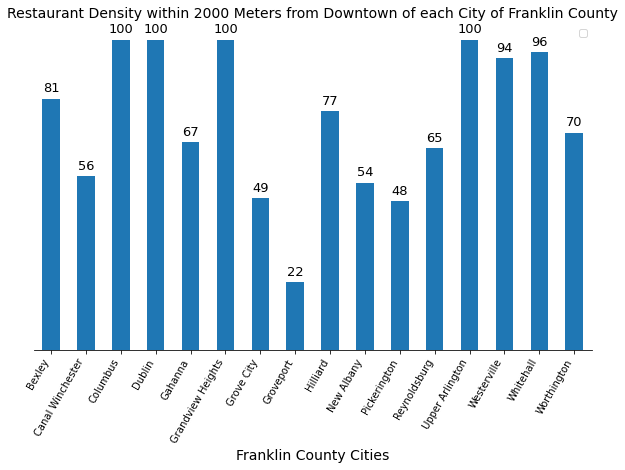

In [30]:
import matplotlib.pyplot as plt

# step 2: plot data
ax = cts.plot(kind='bar', figsize=(10, 6))

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.legend([])            #removes the legend
plt.xticks(rotation=60, ha='right')
plt.xlabel('Franklin County Cities', fontsize=14)
plt.yticks([])            #removes the yaxis ticks display

for p in ax.patches:                 
    a_number = np.round(p.get_height(),decimals=4)
    ax.annotate(a_number, 
                (p.get_x()+p.get_width()/2., 
                 p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=13)

plt.title('Restaurant Density within 2000 Meters from Downtown of each City of Franklin County', fontsize=14) # add title to the plot

plt.show()

### __Step 10:__ Get Income Data of the cities in Franklin County and their relative Ranking

__Step 10a:__ Get Income data for Ohio for all cities in Ohio

In [31]:
url="https://www.cleveland.com/datacentral/2020/01/every-ohio-city-and-county-ranked-for-median-family-household-income-census-estimates.html"
nurl = requests.get(url)

In [32]:
nurl_data = pd.read_html(nurl.text)
nurl_data[0]
nurl_data2 = nurl_data[0]
nurl_data2.head(5)

,Rankfamilyincome,Place,Medianhouseholdincome,Medianfamilyincome
0,1,Indian Hill,"$210,663","$234,423"
1,2,New Albany,"$203,194","$234,330"
2,3,Pepper Pike,"$193,889","$206,141"
3,4,Powell,"$149,119","$159,747"
4,5,Dublin,"$135,514","$159,381"


In [33]:
nurl_data2=nurl_data2.rename(columns={"Place": "City"})
nurl_data2.head()

,Rankfamilyincome,City,Medianhouseholdincome,Medianfamilyincome
0,1,Indian Hill,"$210,663","$234,423"
1,2,New Albany,"$203,194","$234,330"
2,3,Pepper Pike,"$193,889","$206,141"
3,4,Powell,"$149,119","$159,747"
4,5,Dublin,"$135,514","$159,381"


__Step 10b:__ Filter out only the Cities in Franklin County

In [34]:
result1 = pd.merge(wiki_franklin_cities[['City','Population']], 
                   nurl_data2[['City','Rankfamilyincome', 'Medianfamilyincome']], 
                   on='City')
result1['Rankfamilyincome'] = pd.to_numeric(result1['Rankfamilyincome'])
result1=result1.set_index('Rankfamilyincome')
result1.sort_values(by='Rankfamilyincome')

,City,Population,Medianfamilyincome
Rankfamilyincome,,,
2,New Albany,7724,"$234,330"
5,Dublin,48647,"$159,381"
8,Upper Arlington,33771,"$142,103"
10,Bexley,13057,"$135,556"
11,Grandview Heights,6536,"$132,232"
22,Worthington,13575,"$120,000"
26,Hilliard,33672,"$113,122"
34,Westerville,36120,"$106,382"
37,Pickerington,18291,"$103,773"


In [35]:
result2 =result1
result2[result2.columns[2:]] = result2[result2.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
result2['Medianfamilyincome'] = result1['Medianfamilyincome'].astype(int)
result2['Population'] = result1['Population'].astype(int)
result2=result2.reset_index()
result2

,Rankfamilyincome,City,Population,Medianfamilyincome
0,10,Bexley,13057,135556
1,40,Canal Winchester,7101,101801
2,149,Columbus,892672,61112
3,5,Dublin,48647,159381
4,41,Gahanna,33248,99962
5,11,Grandview Heights,6536,132232
6,62,Grove City,41627,85978
7,72,Groveport,5363,83152
8,26,Hilliard,33672,113122
9,2,New Albany,7724,234330


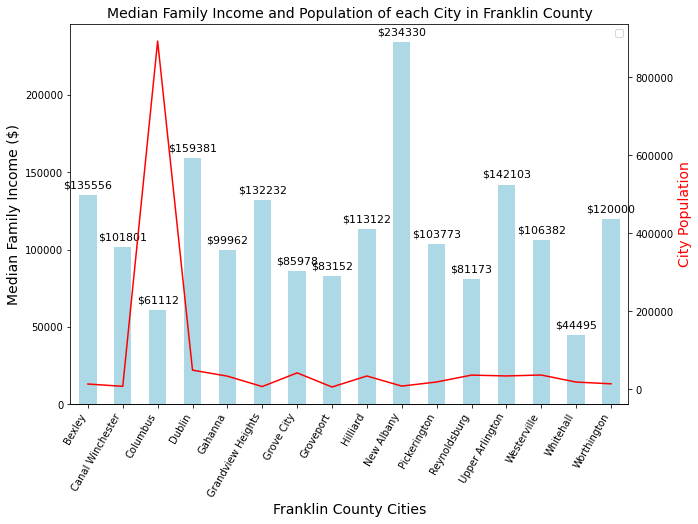

In [36]:
ax = result2[['City', 'Medianfamilyincome']].plot(kind='bar', figsize=(10, 7), color='lightblue', grid=False)
ax.grid(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.ylabel('Median Family Income ($)',fontsize=14)
plt.xlabel('Franklin County Cities', fontsize=14)
plt.legend([])            #removes the legend

result2['Population'].plot(secondary_y=True, color='red', grid=False)
ax.set_xticklabels(result2['City'], rotation=60, ha = 'right')

plt.xticks(rotation=60, ha='right')
plt.grid(False)
plt.ylabel('City Population',fontsize=14,color='red')

for p in ax.patches:                 
    a_number = np.round(p.get_height(),decimals=4)
    inc = "${}".format(a_number)
    ax.annotate(inc, 
                (p.get_x()+p.get_width()/2., 
                 p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=11)

plt.title('Median Family Income and Population of each City in Franklin County', fontsize=14) # add title to the plot

plt.show()

### __Step 11:__ Get Demographic and Population Data

In [37]:
url='https://datausa.io/api/data?Geography=05000US39049&Nativity=2&measure=Total%20Population,Total%20Population%20MOE%20Appx&drilldowns=Birthplace&properties=Country%20Code'
xnurl = requests.get(url)

xnurl_data = pd.read_csv('Global Diversity.csv')
data2018=xnurl_data[xnurl_data['Year']==2018].sort_values(by='Total Population', ascending=False)
top5=data2018.head(5)
top5

,ID Birthplace,Birthplace,ID Year,Year,ID Nativity,Nativity,Country Code,Total Population,Total Population MOE Appx,Geography,ID Geography
51,210,India,2018,2018,2,Foreign born,IND,62221,6107.793218,Ohio,04000US39
82,303,Mexico,2018,2018,2,Foreign born,MEX,44382,5162.406135,Ohio,04000US39
49,207,China,2018,2018,2,Foreign born,CHN,35261,4603.265881,Ohio,04000US39
67,233,Philippines,2018,2018,2,Foreign born,PHL,16342,3136.343160,Ohio,04000US39
81,301,Canada,2018,2018,2,Foreign born,CAN,14751,2979.965919,Ohio,04000US39


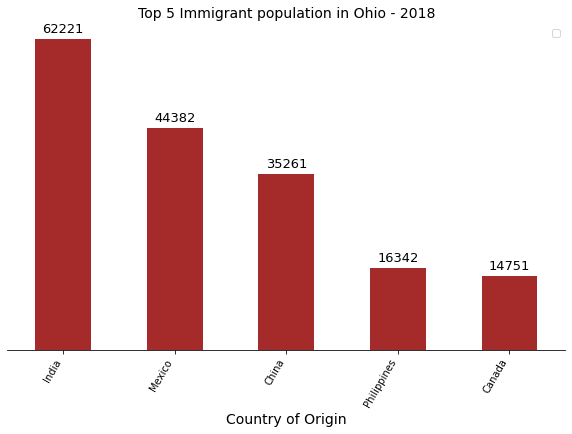

In [39]:
import matplotlib.pyplot as plt

# step 2: plot data
ax = top5.plot(kind='bar', x='Birthplace', y='Total Population', figsize=(10, 6), color='brown')

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.legend([])            #removes the legend
plt.xticks(rotation=60, ha='right')
plt.xlabel('Country of Origin', fontsize=14)
plt.yticks([])            #removes the yaxis ticks display

for p in ax.patches:                 
    a_number = np.round(p.get_height(),decimals=4)
    ax.annotate(a_number, 
                (p.get_x()+p.get_width()/2., 
                 p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=13)

plt.title('Top 5 Immigrant population in Ohio - 2018', fontsize=14) # add title to the plot

plt.show()

In [4]:
url='https://datausa.io/api/data?Geography=05000US39049&drilldowns=Race,Ethnicity&measures=Hispanic%20Population,Hispanic%20Population%20Moe'
xnurl = requests.get(url)
xnurl_data = pd.read_csv('Race and Ethnicity.csv')
data2016=xnurl_data[xnurl_data['Year']==2016].sort_values(by='Population', ascending=False)
top5=data2016.head(5)
top5

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,Hispanic Population Moe,Geography,ID Geography,Slug Geography,Population,share
28,0,White Alone,0,Not Hispanic or Latino,2016,2016,1193.000000,"Franklin County, OH",05000US39049,franklin-county-oh,810480,0.640940
30,1,Black or African American Alone,0,Not Hispanic or Latino,2016,2016,4459.000000,"Franklin County, OH",05000US39049,franklin-county-oh,276534,0.218687
34,3,Asian Alone,0,Not Hispanic or Latino,2016,2016,1867.000000,"Franklin County, OH",05000US39049,franklin-county-oh,62417,0.049360
29,0,White Alone,1,Hispanic or Latino,2016,2016,4662.000000,"Franklin County, OH",05000US39049,franklin-county-oh,44754,0.035392
40,6,Two or More Races,0,Not Hispanic or Latino,2016,2016,5056.380128,"Franklin County, OH",05000US39049,franklin-county-oh,42128,0.033315


<ipython-input-5-54c02a5f785e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5['Race'] = top5['Race'].astype(str) + top5['Ethnicity']


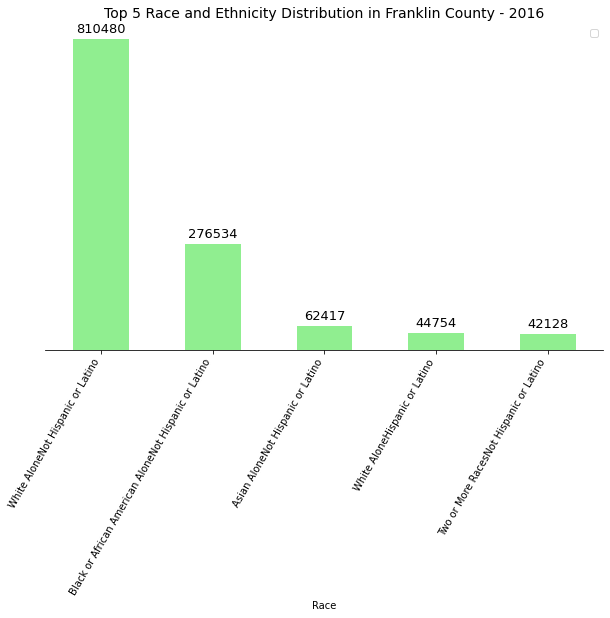

In [5]:
import matplotlib.pyplot as plt

# step 2: plot data
top5['Race'] = top5['Race'].astype(str) + top5['Ethnicity']
ax = top5.plot(kind='bar', x='Race', y='Population', figsize=(10, 6), color='lightgreen')

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)

plt.legend([])            #removes the legend
plt.xticks(rotation=60, ha='right')
plt.yticks([])            #removes the yaxis ticks display

for p in ax.patches:                 
    a_number = np.round(p.get_height(),decimals=4)
    ax.annotate(a_number, 
                (p.get_x()+p.get_width()/2., 
                 p.get_height()),
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points',
               fontsize=13)

plt.title('Top 5 Race and Ethnicity Distribution in Franklin County - 2016', fontsize=14) # add title to the plot

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## __V. Methodology:__  Analysis of the Franklin County Neighborhood <a name="Methods"></a>
[_Back to Table of Contents_](#TOC)

>__Step A:__ Convert Venue Category to a numeric using the One Hot conversion - using the same name as category value (no Prefix) - This will give the total number of categories

>__Step B:__ Group all the venues at the City level 

>__Step C:__ Model and Identify the optimal number of clusters using the ML Algorithm of KMeans from SKLEARN Package and visualize using the KElbowVisualizer of yellowbrick package

>__Step D:__ Cluster the Venues into the number of Clusters

>__Step E:__ Visualize the clusters with the Folium map

### __Step A:__ Convert Venue Category to a numeric using the One Hot conversion - using the same name as category value (no Prefix) - This will give the total number of categories

In [42]:
# one hot encoding
franklin_cities_onehot = pd.get_dummies(franklin_cities_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
franklin_cities_onehot['City'] = franklin_cities_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [franklin_cities_onehot.columns[-1]] + list(franklin_cities_onehot.columns[:-1])
franklin_cities_onehot = franklin_cities_onehot[fixed_columns]
print ("franklin_cities_onehot ", franklin_cities_onehot.shape)
franklin_cities_onehot.head()

franklin_cities_onehot  (1179, 206)


,City,ATM,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bavarian Restaurant,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Business Service,Café,Cajun / Creole Restaurant,Capitol Building,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dry Cleaner,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,High School,Historic Site,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Palace,Paper / Office Supplies Store,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bexley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### __Step B:__ Group all the venues at the City level 

In [43]:
franklin_cities_grouped = franklin_cities_onehot.groupby('City').mean().reset_index()
print ("franklin_cities_grouped ", franklin_cities_grouped.shape)
franklin_cities_grouped

franklin_cities_grouped  (16, 206)


,City,ATM,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Bavarian Restaurant,Beer Store,Big Box Store,Bistro,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridal Shop,Buffet,Burger Joint,Business Service,Café,Cajun / Creole Restaurant,Capitol Building,Caribbean Restaurant,Chinese Restaurant,Chiropractor,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Donut Shop,Dry Cleaner,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,Gift Shop,Gluten-free Restaurant,Golf Course,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,High School,Historic Site,Hobby Shop,Hockey Arena,Home Service,Hot Dog Joint,Hotel,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Lawyer,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Noodle House,Office,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Store,Palace,Paper / Office Supplies Store,Park,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pool Hall,Print Shop,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Rest Area,Restaurant,Salon / Barbershop,Sandwich Place,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Turkish Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Water Park,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio
0,Bexley,0.000000,0.024691,0.000000,0.000000,0.00,0.00,0.000000,0.012346,0.012346,0.000000,0.012346,0.037037,0.061728,0.000000,0.012346,0.000000,0.012346,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.012346,0.000000,0.00,0.000000,0.012346,0.00,0.012346,0.000000,0.00,0.00,0.024691,0.000000,0.000000,0.000000,0.00,0.037037,0.00,0.012346,0.000000,0.000000,0.012346,0.012346,0.00,0.012346,0.00,0.024691,0.012346,0.00,0.00,0.000000,0.012346,0.000000,0.00,0.000000,0.000000,0.024691,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.012346,0.000000,0.000000,0.024691,0.00,0.012346,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.024691,0.000000,0.024691,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.037037,0.012346,0.012346,0.000000,0.012346,0.00,0.024691,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.024691,0.000000,0.012346,0.012346,0.00,0.000000,0.00,0.012346,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.037037,0.00,0.000000,

#### Clustering the neighborhood

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
franklin_cities_venues_sorted = pd.DataFrame(columns=columns)
franklin_cities_venues_sorted['City'] = franklin_cities_grouped['City']

for ind in np.arange(franklin_cities_grouped.shape[0]):
    franklin_cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(franklin_cities_grouped.iloc[ind, :], num_top_venues)

print ("franklin_cities_venues_sorted ", franklin_cities_venues_sorted.shape)
franklin_cities_venues_sorted

franklin_cities_venues_sorted  (16, 11)


,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bexley,Pizza Place,Bank,Sandwich Place,Bakery,Coffee Shop,Park,Ice Cream Shop,Mediterranean Restaurant,Garden,Italian Restaurant
1,Canal Winchester,Pizza Place,American Restaurant,Bank,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Mobile Phone Shop,Gas Station
2,Columbus,Coffee Shop,Park,Bar,American Restaurant,Brewery,Restaurant,Café,Hotel,Taco Place,Italian Restaurant
3,Dublin,Hotel,Pizza Place,Italian Restaurant,Bank,Bar,Café,Sandwich Place,Park,Department Store,Ice Cream Shop
4,Gahanna,Sandwich Place,Pizza Place,American Restaurant,Bar,Mexican Restaurant,Discount Store,Ice Cream Shop,Bank,Park,Chinese Restaurant
5,Grandview Heights,Coffee Shop,Bar,Pizza Place,American Restaurant,Wine Shop,Sandwich Place,Italian Restaurant,Mexican Restaurant,Hotel,Grocery Store
6,Grove City,Pizza Place,Sandwich Place,Ice Cream Shop,Park,Soccer Field,Diner,Discount Store,Video Game Store,Fast Food Restaurant,Gas Station
7,Groveport,Pizza Place,Park,Bar,Bank,Soccer Field,Smoke Shop,Chinese Restaurant,Supermarket,Mexican Restaurant,Coffee Shop
8,Hilliard,Pizza Place,Fast Food Restaurant,Bank,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Trail,Sandwich Place,Bar,Mexican Restaurant
9,New Albany,Coffee Shop,Bank,Gym / Fitness Center,Pizza Place,Sandwich Place,Supermarket,Chinese Restaurant,American Restaurant,Hotel,Gym


In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### __Step C:__ Model and Identify the optimal number of clusters using the ML Algorithm of KMeans from SKLEARN Package and visualize using the KElbowVisualizer of yellowbrick package

#### Applying the K-Means algorithm to cluster the neighborhood into clusters.

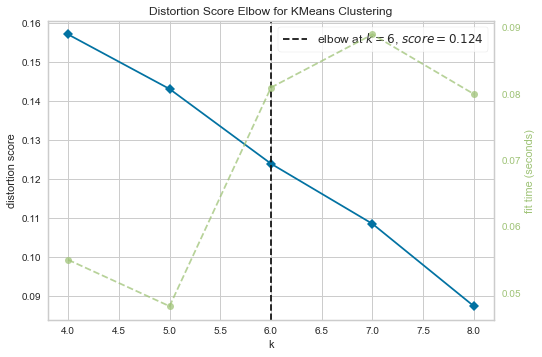

In [48]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

franklin_cities_grouped_clustering = franklin_cities_grouped.drop('City', 1)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,9))
visualizer.fit(franklin_cities_grouped_clustering)
visualizer.poof()

### __Step D:__ Cluster the Venues into the number of Clusters

In [53]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 6

franklin_cities_grouped_clustering = franklin_cities_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(franklin_cities_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 3, 3, 0, 3, 5, 2, 1, 1])

In [54]:
franklin_cities_venues_sorted.head()

,Cluster Labels,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,6,Bexley,Pizza Place,Bank,Sandwich Place,Bakery,Coffee Shop,Park,Ice Cream Shop,Mediterranean Restaurant,Garden,Italian Restaurant
1,1,Canal Winchester,Pizza Place,American Restaurant,Bank,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Mobile Phone Shop,Gas Station
2,0,Columbus,Coffee Shop,Park,Bar,American Restaurant,Brewery,Restaurant,Café,Hotel,Taco Place,Italian Restaurant
3,5,Dublin,Hotel,Pizza Place,Italian Restaurant,Bank,Bar,Café,Sandwich Place,Park,Department Store,Ice Cream Shop
4,1,Gahanna,Sandwich Place,Pizza Place,American Restaurant,Bar,Mexican Restaurant,Discount Store,Ice Cream Shop,Bank,Park,Chinese Restaurant


In [56]:
# add clustering labels
#franklin_cities_venues_sorted.drop(['Cluster Labels'], axis=1, inplace=True)
franklin_cities_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

franklin_cities_merged = franklin_cities

franklin_cities_merged = franklin_cities_merged.join(franklin_cities_venues_sorted.set_index('City'), on='City')
print("franklin_cities_merged: ", franklin_cities_merged.shape)
franklin_cities_merged # check the last columns!

franklin_cities_merged:  (16, 14)


,City,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Bexley,39.9692,-82.9369,1,Pizza Place,Bank,Sandwich Place,Bakery,Coffee Shop,Park,Ice Cream Shop,Mediterranean Restaurant,Garden,Italian Restaurant
38,Canal Winchester,39.8429,-82.8159,0,Pizza Place,American Restaurant,Bank,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Mobile Phone Shop,Gas Station
58,Columbus,39.9623,-83.0007,3,Coffee Shop,Park,Bar,American Restaurant,Brewery,Restaurant,Café,Hotel,Taco Place,Italian Restaurant
71,Dublin,40.0992,-83.1141,3,Hotel,Pizza Place,Italian Restaurant,Bank,Bar,Café,Sandwich Place,Park,Department Store,Ice Cream Shop
91,Gahanna,40.0196,-82.8791,0,Sandwich Place,Pizza Place,American Restaurant,Bar,Mexican Restaurant,Discount Store,Ice Cream Shop,Bank,Park,Chinese Restaurant
97,Grandview Heights,39.9798,-83.0407,3,Coffee Shop,Bar,Pizza Place,American Restaurant,Wine Shop,Sandwich Place,Italian Restaurant,Mexican Restaurant,Hotel,Grocery Store
100,Grove City,39.8815,-83.093,5,Pizza Place,Sandwich Place,Ice Cream Shop,Park,Soccer Field,Diner,Discount Store,Video Game Store,Fast Food Restaurant,Gas Station
101,Groveport,39.8522,-82.8869,2,Pizza Place,Park,Bar,Bank,Soccer Field,Smoke Shop,Chinese Restaurant,Supermarket,Mexican Restaurant,Coffee Shop
106,Hilliard,40.0338,-83.1596,1,Pizza Place,Fast Food Restaurant,Bank,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Trail,Sandwich Place,Bar,Mexican Restaurant
161,New Albany,40.0812,-82.8088,1,Coffee Shop,Bank,Gym / Fitness Center,Pizza Place,Sandwich Place,Supermarket,Chinese Restaurant,American Restaurant,Hotel,Gym


### __Step E:__ Visualize the clusters with the Folium map

#### Create Columbus Map with the clusters

In [57]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(franklin_cities_merged['Latitude'], franklin_cities_merged['Longitude'], franklin_cities_merged['City'], franklin_cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examine Clusters

In [58]:
franklin_cities_merged.shape

(16, 14)

In [71]:
franklin_cities_merged
franklin_cities_merged=franklin_cities_merged.set_index('Cluster Labels')
franklin_cities_merged.sort_values(by='Cluster Labels')

,level_0,index,City,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,,
0,1,1,Canal Winchester,39.8429,-82.8159,Pizza Place,American Restaurant,Bank,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Mobile Phone Shop,Gas Station
0,4,4,Gahanna,40.0196,-82.8791,Sandwich Place,Pizza Place,American Restaurant,Bar,Mexican Restaurant,Discount Store,Ice Cream Shop,Bank,Park,Chinese Restaurant
1,0,0,Bexley,39.9692,-82.9369,Pizza Place,Bank,Sandwich Place,Bakery,Coffee Shop,Park,Ice Cream Shop,Mediterranean Restaurant,Garden,Italian Restaurant
1,8,8,Hilliard,40.0338,-83.1596,Pizza Place,Fast Food Restaurant,Bank,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Trail,Sandwich Place,Bar,Mexican Restaurant
1,9,9,New Albany,40.0812,-82.8088,Coffee Shop,Bank,Gym / Fitness Center,Pizza Place,Sandwich Place,Supermarket,Chinese Restaurant,American Restaurant,Hotel,Gym
1,13,13,Westerville,40.1261,-82.9295,Pizza Place,Bank,Coffee Shop,American Restaurant,Breakfast Spot,Fast Food Restaurant,Park,Bakery,Thrift / Vintage Store,Sandwich Place
1,15,15,Worthington,40.0931,-83.018,Pizza Place,Italian Restaurant,American Restaurant,Bank,Bakery,Ice Cream Shop,Salon / Barbershop,Sandwich Place,Coffee Shop,Gym / Fitness Center
2,7,7,Groveport,39.8522,-82.8869,Pizza Place,Park,Bar,Bank,Soccer Field,Smoke Shop,Chinese Restaurant,Supermarket,Mexican Restaurant,Coffee Shop
3,2,2,Columbus,39.9623,-83.0007,Coffee Shop,Park,Bar,American Restaurant,Brewery,Restaurant,Café,Hotel,Taco Place,Italian Restaurant


In [72]:
franklin_cities_merged= franklin_cities_merged.reset_index()
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 0, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,0,39.8429,-82.8159,Pizza Place,American Restaurant,Bank,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Bakery,Coffee Shop,Mobile Phone Shop,Gas Station
4,0,40.0196,-82.8791,Sandwich Place,Pizza Place,American Restaurant,Bar,Mexican Restaurant,Discount Store,Ice Cream Shop,Bank,Park,Chinese Restaurant


In [73]:
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 1, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,39.9692,-82.9369,Pizza Place,Bank,Sandwich Place,Bakery,Coffee Shop,Park,Ice Cream Shop,Mediterranean Restaurant,Garden,Italian Restaurant
8,1,40.0338,-83.1596,Pizza Place,Fast Food Restaurant,Bank,Ice Cream Shop,Gym / Fitness Center,Pharmacy,Trail,Sandwich Place,Bar,Mexican Restaurant
9,1,40.0812,-82.8088,Coffee Shop,Bank,Gym / Fitness Center,Pizza Place,Sandwich Place,Supermarket,Chinese Restaurant,American Restaurant,Hotel,Gym
13,1,40.1261,-82.9295,Pizza Place,Bank,Coffee Shop,American Restaurant,Breakfast Spot,Fast Food Restaurant,Park,Bakery,Thrift / Vintage Store,Sandwich Place
15,1,40.0931,-83.018,Pizza Place,Italian Restaurant,American Restaurant,Bank,Bakery,Ice Cream Shop,Salon / Barbershop,Sandwich Place,Coffee Shop,Gym / Fitness Center


In [74]:
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 2, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,2,39.8522,-82.8869,Pizza Place,Park,Bar,Bank,Soccer Field,Smoke Shop,Chinese Restaurant,Supermarket,Mexican Restaurant,Coffee Shop


In [75]:
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 3, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,3,39.9623,-83.0007,Coffee Shop,Park,Bar,American Restaurant,Brewery,Restaurant,Café,Hotel,Taco Place,Italian Restaurant
3,3,40.0992,-83.1141,Hotel,Pizza Place,Italian Restaurant,Bank,Bar,Café,Sandwich Place,Park,Department Store,Ice Cream Shop
5,3,39.9798,-83.0407,Coffee Shop,Bar,Pizza Place,American Restaurant,Wine Shop,Sandwich Place,Italian Restaurant,Mexican Restaurant,Hotel,Grocery Store
12,3,39.9945,-83.0624,Coffee Shop,Mexican Restaurant,Italian Restaurant,Salon / Barbershop,Sandwich Place,Pizza Place,Wine Shop,Bank,Clothing Store,Wings Joint


In [76]:
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 4, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,4,39.9548,-82.8121,Pizza Place,Fast Food Restaurant,Bar,Park,Bank,Discount Store,Mexican Restaurant,Gas Station,Chinese Restaurant,Grocery Store
14,4,39.9667,-82.8855,Fast Food Restaurant,Gas Station,Discount Store,Pizza Place,Fried Chicken Joint,Bank,Cosmetics Shop,Pharmacy,Sandwich Place,Chinese Restaurant


In [77]:
franklin_cities_merged.loc[franklin_cities_merged['Cluster Labels'] == 5, franklin_cities_merged.columns[[0] + list(range(4, franklin_cities_merged.shape[1]))]]

,Cluster Labels,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,5,39.8815,-83.093,Pizza Place,Sandwich Place,Ice Cream Shop,Park,Soccer Field,Diner,Discount Store,Video Game Store,Fast Food Restaurant,Gas Station
10,5,39.8963,-82.7732,Pizza Place,Pharmacy,Sandwich Place,Coffee Shop,Automotive Shop,Bank,Video Store,Supermarket,Gas Station,Pet Store


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## VI. Results and Discussion <a name="Results"></a>
[_Back to Table of Contents_](#TOC)



As we can see from the analysis so far, Ohio has sizeable Asian descent immigrant population, and we can see a microcosm of that in the demography of Franklin County. From the census statistics of 2018, for the state of Ohio, we can see the top 5 immigrants – Indian immigrants top the list. In Franklin county we do see the Asians make up the third largest grouping. While the distribution within the Asian community is not available for this study, we can safely assume the ratio is similar as at the state level. It is more so prevalent as significant population of Indian community work in the high-tech sector of IT and associated industry and these industries are in significant number around Columbus, OH in Franklin County. An important factor to keep in mind is the affluence in the cities. Franklin county boasts of 4 of the top 10 cities in terms of Median Family Income. This point and the fact that the cities in the vicinity of Columbus which has significant number of Indian Population is the ideal target for the location of the Indian Restaurant. Coming to the public infrastructure, we saw that the cities are well laid out with freeway connectivity all around. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## VII. Conclusion <a name="Conclusion"></a>
[_Back to Table of Contents_](#TOC)


Based on the above results and discussion, the recommendation of location of the Indian Restaurant is in any of the three top cities in the Franklin County – New Albany, Upper Arlington, and Dublin. 

The stakeholders should also consider other parameters like the real estate cost, density of foot traffic in locating the restaurant. 


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## VIII. Appendix <a name="Appendix"></a>
[_Back to Table of Contents_](#TOC)

### Further Research to support additional hypotheses
To check for Radius = 10000 meters - to see the additional Indian Restaurants - But it did inot give any additional numbers to influence the conclusion

In [85]:
df_restaurants[df_restaurants['Venue Category'].str.contains('Indian')]

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
57,Bexley,39.969238,-82.936864,Aab India Restaurant,39.957236,-82.934840,Indian Restaurant
228,Columbus,39.962260,-83.000707,Indian Oven,39.957369,-82.987884,Indian Restaurant
422,Grandview Heights,39.979786,-83.040740,Aab India Restaurant,39.987737,-83.044456,Indian Restaurant
839,Upper Arlington,39.994508,-83.062408,Aab India Restaurant,39.987737,-83.044456,Indian Restaurant


In [96]:
def getNearbyVenues2(names, latitudes, longitudes, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
# type your answer here
franklin_cities_venues_10000 = getNearbyVenues2(names=franklin_cities['City'],
                                   latitudes=franklin_cities['Latitude'],
                                   longitudes=franklin_cities['Longitude'],
                                         radius=10000
                                  )

Bexley
Canal Winchester
Columbus
Dublin
Gahanna
Grandview Heights
Grove City
Groveport
Hilliard
New Albany
Pickerington
Reynoldsburg
Upper Arlington
Westerville
Whitehall
Worthington


In [97]:
print(franklin_cities_venues_10000.shape)
franklin_cities_venues_10000.head()

(1557, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bexley,39.969238,-82.936864,Franklin Park Conservatory and Botanical Gardens,39.965933,-82.952814,Garden
1,Bexley,39.969238,-82.936864,Franklin Park,39.965362,-82.955221,Park
2,Bexley,39.969238,-82.936864,Johnson's Real Ice Cream,39.957082,-82.925941,Ice Cream Shop
3,Bexley,39.969238,-82.936864,Rubino's Pizza,39.956722,-82.928103,Pizza Place
4,Bexley,39.969238,-82.936864,Jeni's Splendid Ice Creams,39.957373,-82.941965,Ice Cream Shop


In [98]:
df_restaurants_10000 = franklin_cities_venues_10000[franklin_cities_venues_10000['Venue Category'].str.contains('Indian')]
df_restaurants_10000

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
291,Dublin,40.099229,-83.114077,Amul India,40.086612,-83.092769,Indian Restaurant
818,Hilliard,40.033814,-83.159611,Amul India,40.086612,-83.092769,Indian Restaurant
1516,Worthington,40.093094,-83.017959,Amul India,40.086612,-83.092769,Indian Restaurant


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------